# **Aviation Accidents Analysis**
Authors: Dolgor Purbueva

![Alt text](images/image1.png)

## Overview

The project aims to support the development of a new aviation business line by providing three business recommendations based on data analysis. 

The objective is to identify the lowest-risk aircraft makes and models for the company to consider for its new aviation ventures. The analysis focuses on key variables such as aircraft make and model, fatalities, time of accidents and accident locations. By addressing missing data, interpreting and visualizing the information, the analysis seeks to offer data-driven insights. 

The findings will help the company mitigate potential risks and make informed decisions about aircraft purchases, ensuring a safe and strategic entry into the aviation market.

## Business Problem

Company is expanding into the aviation industry to diversify it's portfolio by purchasing and operating aircrafts for profit enterprises. The company needs to expand knowledge about aviation business and the potential risks associated with different aircrafts. Questions this analysis will try to answer include - which directions of aviation business to consider, which aircraft present the lowest risk and what factors contribute to evaluated safety.

## Data Used

The [National Transportation Safety Board aviation accident dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters. Detailed accidents reports can be accessed on [NTSB website](https://www.ntsb.gov/Pages/AviationQueryV2.aspx).

## Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/AviationData.csv', engine = 'python')

## Understanding Data

In [2]:
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
df.shape


(88889, 31)

In [4]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [5]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning

Data cleaning will be done in several steps, with each step eliminating unnecessary data and bringing the dataframe to a convenient format:
* Handling missing values
* Deleting duplicates
* Changing data types

In [7]:
# Cleaning columns formatting
df.columns = df.columns.str.replace('.', ' ').str.strip()

# Deleting unnecessary columns
df = df.drop(columns=['Investigation Type', 'Accident Number', 'Latitude', 'Longitude', 'Airport Code', 'Registration Number', 'FAR Description', 'Schedule', 'Report Status', 'Publication Date'])

In [8]:
# Deleting duplicate rows by unique ID

df = df.groupby('Event Id').first().reset_index()

In [9]:
# Changin data type for Date column

df['Event Date'] = pd.to_datetime(df['Event Date'])

In [10]:
# Excluding Amateur Built aircrafts 

df = df[df['Amateur Built'] == 'No']

In [11]:
# Cleaning Make column formatting

df['Make'] = df['Make'].str.title()

for word in [".", "Ltd", "Inc", "Air", "Company", "Co", "Helicopter", "Design", "rp"]:
    df['Make'] = df['Make'].str.replace(word, ' ').str.strip()

In [12]:
# Split location in city and state columns

df['City'] = df['Location'].str.split(',').str[0].str.title()
df['State'] = df['Location'].str.split(',').str[1]

In [13]:
#Add a day, month & year columns

df['Year'] = df['Event Date'].dt.year
df['Month'] = df['Event Date'].dt.month
df['Day'] = df['Event Date'].dt.day

In [14]:
df.isnull().sum()

Event Id                      0
Event Date                    0
Location                     47
Country                     216
Airport Name              32658
Injury Severity             989
Aircraft damage            3033
Aircraft Category         50813
Make                         46
Model                        67
Amateur Built                 0
Number of Engines          5639
Engine Type                6605
Purpose of flight          5996
Air carrier               63846
Total Fatal Injuries      10033
Total Serious Injuries    10912
Total Minor Injuries      10401
Total Uninjured            4844
Weather Condition          4333
Broad phase of flight     24116
City                         47
State                       530
Year                          0
Month                         0
Day                           0
dtype: int64

## Data Analysis: Business flights in USA

In this analysis we focus on business charter flights in two categories - airplanes and helicopters in the United States. We analyse relevant accidents - dated after 2005, as the aircarft industry has developed significantly and older data points can distort the findings. As an outcome of this analysis we will be able to provide lists of recommended makes for both categories based on calculating accident survival rates.

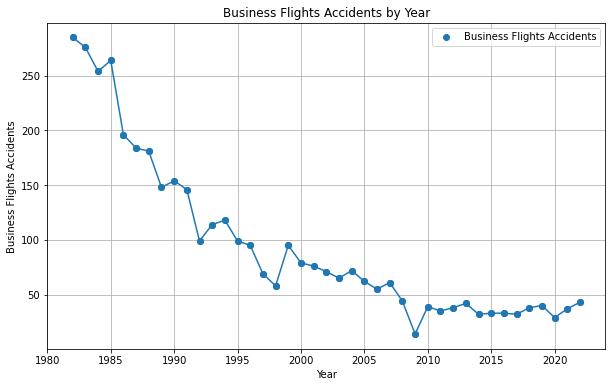

In [15]:
# Filtering business flights
bf = df[df['Purpose of flight'] == 'Business']

#Counting accidents in each year/month
bf_years = bf.groupby('Year')['Event Id'].count().reset_index(name='count')
bf_month = bf.groupby('Month')['Event Id'].count().reset_index(name='count')

# Plotting all business flights accindets over years
x_y = bf_years['Year']
y_y = bf_years['count']

plt.figure(figsize=(10, 6))
plt.scatter(x_y, y_y, label='Business Flights Accidents')
plt.plot(x_y, y_y, linestyle='-', marker='o')  # Adding lines and markers

plt.xlabel('Year')
plt.ylabel('Business Flights Accidents')
plt.title('Business Flights Accidents by Year')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Filtering by location, time and categories
bf = bf[bf['Country'] == 'United States']
bf = bf[bf['Year'] > 2005 ]
bf = bf[(bf['Aircraft Category'] == 'Airplane') |(bf['Aircraft Category'] == 'Helicopter')]

# Cleaning rows with missing values in necessary columns
bf = bf.dropna(subset=['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Total Uninjured'])

# Adding columns with new data
bf['Number of Passengers'] = bf['Total Fatal Injuries'] + bf['Total Serious Injuries'] + bf['Total Minor Injuries'] + bf['Total Uninjured']
bf['Survival rate'] = (bf['Total Serious Injuries'] + bf['Total Minor Injuries'] + bf['Total Uninjured']) / bf['Number of Passengers']

In [17]:
# saving dataframe for airplanes
bf_air = bf[bf['Aircraft Category'] == 'Airplane']

# saving dataframe for helicopters
bf_heli = bf[bf['Aircraft Category'] == 'Helicopter']

## Airplanes

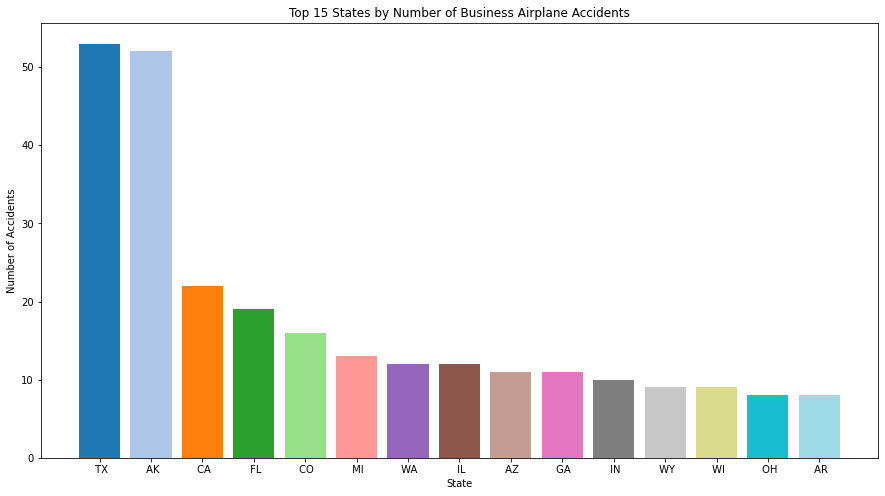

In [18]:
# Counting accidents per state
state_counts = bf_air['State'].value_counts().reset_index()
state_counts.columns = ['State', 'count']

# Sorting and selecting top 15 states
top_15_states = state_counts.nlargest(15, 'count')
colors = plt.cm.tab20(np.linspace(0, 1, len(top_15_states)))

plt.figure(figsize=(15, 8))
plt.bar(top_15_states['State'], top_15_states['count'], color=colors)
plt.title('Top 15 States by Number of Business Airplane Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

plt.show()

In [19]:
# Grouping rows by Make. Calculating mean Survival rate and Total Accidents per Make

group_columns = ['Make']

bf_air_grouped = pd.merge(
    bf_air.groupby(group_columns).mean(), # means
    bf_air.groupby(group_columns).size().reset_index(name="Total accidents"), # total
    on=group_columns,
)
bf_air_grouped = bf_air_grouped[bf_air_grouped["Total accidents"] > 5].sort_values(by='Survival rate', ascending=False)
bf_air_grouped

,Make,Number of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year,Month,Day,Number of Passengers,Survival rate,Total accidents
19,Dehavilland,1.100000,0.000000,0.000000,0.000000,7.200000,2016.300000,7.000000,17.600000,7.200000,1.000000,10
58,Raytheon craft,1.666667,0.444444,0.444444,0.222222,2.444444,2014.888889,6.111111,14.777778,3.555556,0.888889,9
11,Cessna,1.357143,0.400000,0.330769,0.192308,1.753846,2015.000000,7.030769,15.038462,2.676923,0.815128,130
54,Piper,1.224138,0.372881,0.169492,0.118644,1.559322,2014.288136,7.084746,16.152542,2.220339,0.806497,59
13,Cirrus,1.000000,0.437500,0.187500,0.125000,1.562500,2014.750000,7.687500,16.500000,2.312500,0.750000,16
4,Beech,1.620690,0.694915,0.169492,0.169492,1.423729,2015.152542,6.474576,16.423729,2.457627,0.669492,59


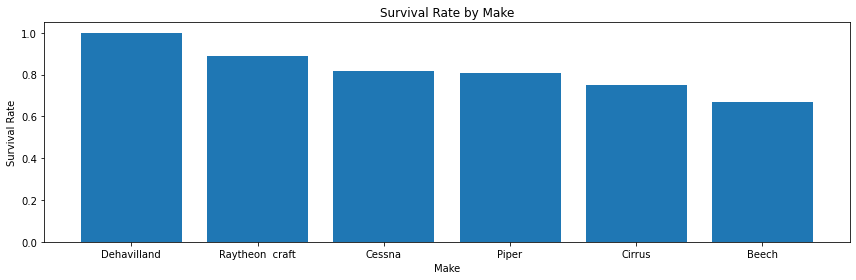

In [20]:
# Plotting survival rate by make that had enough data

plt.figure(figsize=(12,4))
plt.bar(bf_air_grouped['Make'], bf_air_grouped['Survival rate'])
plt.xlabel('Make')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Make')
plt.xticks()
plt.tight_layout()

plt.show()


In [21]:
# Grouping rows by Make and Year. Calculating Total accidents per Year

group_columns_ts = ['Make', 'Year']
bf_time = bf_air.groupby(group_columns_ts).size().reset_index(name="Total accidents")
bf_time

,Make,Year,Total accidents
0,Aero mmander,2013,1
1,Aero mmander,2015,1
2,Aero mmander,2019,1
3,Aero mmander,2020,1
4,Aero Vodochody,2012,1
...,...,...,...
165,Tractor,2021,1
166,Ultramagic Sa,2013,1
167,Vans craft,2021,1
168,Yuneec,2013,1


In [22]:
# Exploring Airplanes Models

group_columns_air_models = ['Make', 'Model', 'Year', 'Survival rate']
bf_air_models = bf_air.groupby(group_columns_air_models).size().reset_index(name="Count")
bf_air_models = bf_air_models[bf_air_models["Make"] == 'Cirrus'].sort_values(by='Survival rate', ascending=False)
bf_air_models

,Make,Model,Year,Survival rate,Count
201,Cirrus,SF50,2021,1.0,1
202,Cirrus,SF50,2022,1.0,1
203,Cirrus,SR-22,2012,1.0,1
204,Cirrus,SR20,2012,1.0,1
210,Cirrus,SR22,2013,1.0,1
211,Cirrus,SR22,2015,1.0,1
212,Cirrus,SR22,2016,1.0,2
213,Cirrus,SR22,2017,1.0,1
214,Cirrus,SR22,2019,1.0,1
215,Cirrus,SR22,2020,1.0,1


Text(0.5, 1.0, 'Total Accidents by Year for Each Make')

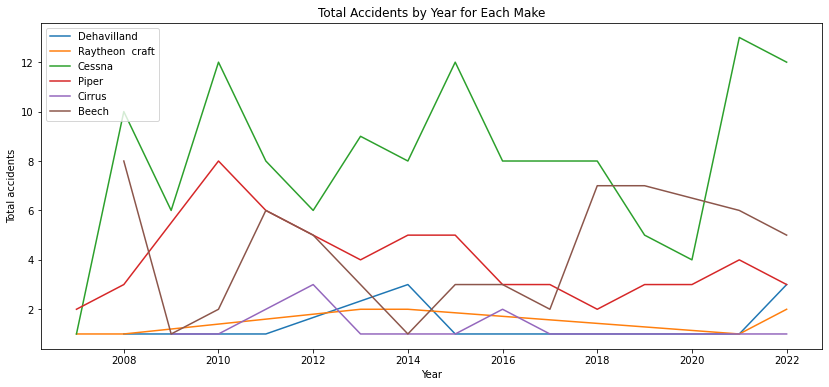

In [23]:
# Plotting total accident over years for each make

plt.figure(figsize=(14, 6))
for make in bf_air_grouped['Make'].unique():
    this_make = bf_time[bf_time['Make'] == make]
    sns.lineplot(x = this_make['Year'], y = this_make['Total accidents'], data = this_make, label=make)
plt.title('Total Accidents by Year for Each Make')


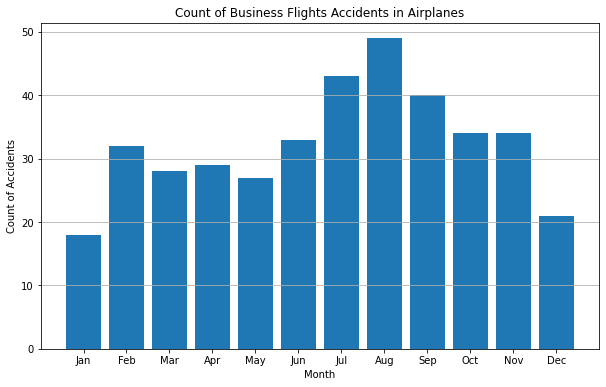

In [24]:
#Counting accidents in each month for airplanes
bf_month_air = bf_air.groupby('Month')['Event Id'].count().reset_index(name='count')

x_m = bf_month_air['Month']
y_m = bf_month_air['count']

# Plotting business flights accidents by months
plt.figure(figsize=(10, 6))
plt.bar(x_m, y_m)
plt.xlabel('Month')
plt.ylabel('Count of Accidents')
plt.title('Count of Business Flights Accidents in Airplanes')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

## Helicopters

In [25]:
# Grouping rows by Make. Calculating mean Survival rate and Total Accidents per Make

group_columns_heli = ['Make']

bf_heli_grouped = pd.merge(
    bf_heli.groupby(group_columns_heli).mean(), # means
    bf_heli.groupby(group_columns_heli).size().reset_index(name="Total accidents"), # total
    on=group_columns_heli,
)
bf_heli_grouped = bf_heli_grouped[bf_heli_grouped["Total accidents"] > 5].sort_values(by='Survival rate', ascending=False)
bf_heli_grouped

,Make,Number of Engines,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Year,Month,Day,Number of Passengers,Survival rate,Total accidents
6,Hughes,1.000000,0.000000,0.333333,1.166667,0.666667,2014.500000,7.166667,13.166667,2.166667,1.000000,6
1,Bell,1.076923,0.071429,0.428571,0.142857,1.642857,2015.285714,6.285714,13.642857,2.285714,0.928571,14
9,Robinson,1.000000,0.264706,0.588235,0.294118,1.205882,2015.058824,7.029412,15.823529,2.352941,0.897059,34


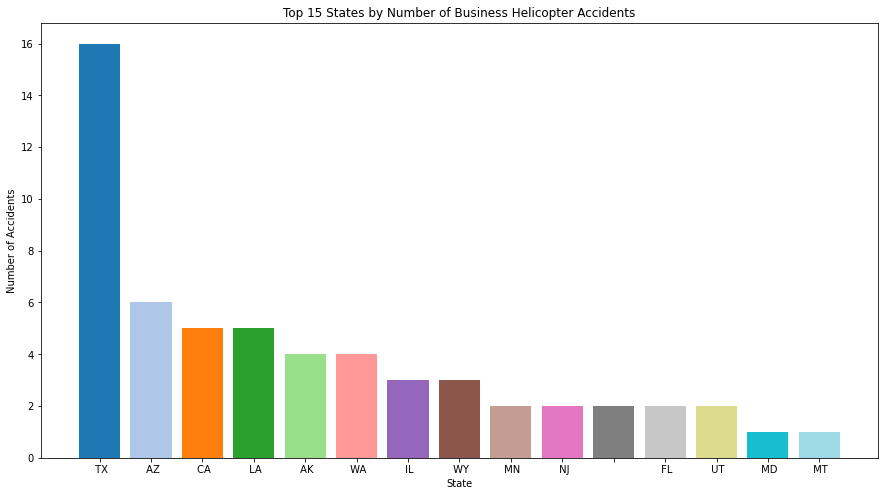

In [26]:
# Counting accidents per state
state_counts_heli = bf_heli['State'].value_counts().reset_index()
state_counts_heli.columns = ['State', 'count']

# Sorting and selecting top 15 states
top_15_states_heli = state_counts_heli.nlargest(15, 'count')
colors = plt.cm.tab20(np.linspace(0, 1, len(top_15_states)))

plt.figure(figsize=(15, 8))  # Make the figure wider
plt.bar(top_15_states_heli['State'], top_15_states_heli['count'], color=colors)
plt.title('Top 15 States by Number of Business Helicopter Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')

plt.show()

In [27]:
# Exploring Helicopter Models for Bell, Robinson and Hughes

group_columns_models = ['Make', 'Model', 'Year', 'Survival rate']
bf_models = bf_heli.groupby(group_columns_models).size().reset_index(name="Count")
bf_models = bf_models[bf_models["Make"] == 'Bell'].sort_values(by='Survival rate', ascending=False)
bf_models

,Make,Model,Year,Survival rate,Count
3,Bell,206,2019,1.0,1
4,Bell,206,2022,1.0,2
5,Bell,206 L4,2016,1.0,1
6,Bell,206B,2013,1.0,2
7,Bell,206B3,2007,1.0,1
9,Bell,206L-3,2012,1.0,2
10,Bell,407,2021,1.0,1
11,Bell,430,2014,1.0,1
12,Bell,47D1,2014,1.0,1
13,Bell,AH-1F,2012,1.0,1


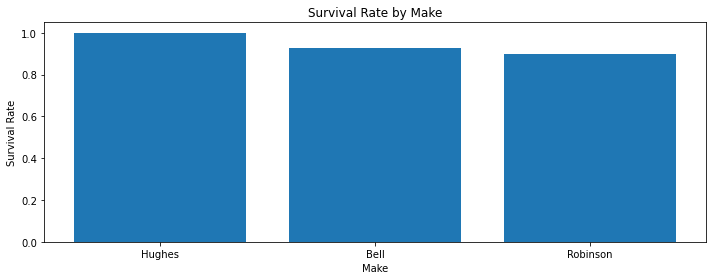

In [28]:
#Plotting survival rate by make

plt.figure(figsize=(10, 4))
plt.bar(bf_heli_grouped['Make'], bf_heli_grouped['Survival rate'])
plt.xlabel('Make')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Make')
plt.xticks()
plt.tight_layout()

plt.show()

In [29]:
# Grouping rows by Make. Calculating Total accidents per Year

group_columns_heli_ts = ['Make', 'Year']
bf_time_heli = bf_heli.groupby(group_columns_heli_ts).size().reset_index(name="Total accidents")

Text(0.5, 1.0, 'Total Accidents by Year for Each Make')

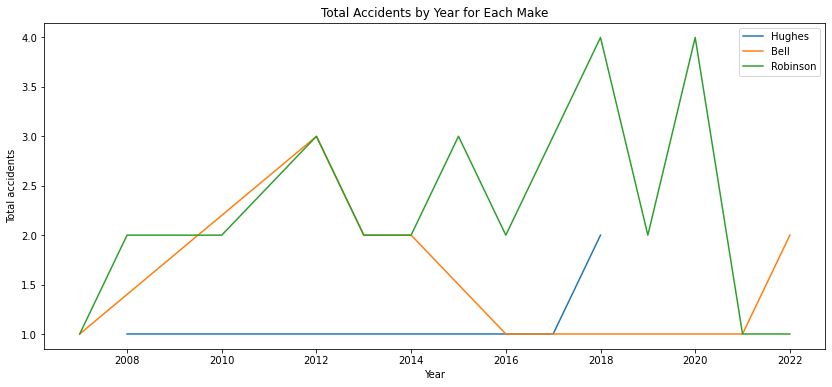

In [30]:
plt.figure(figsize=(14, 6))
for make in bf_heli_grouped['Make'].unique():
    this_make = bf_time_heli[bf_time_heli['Make'] == make]
    sns.lineplot(x = this_make['Year'], y = this_make['Total accidents'], data = this_make, label=make)
plt.title('Total Accidents by Year for Each Make')

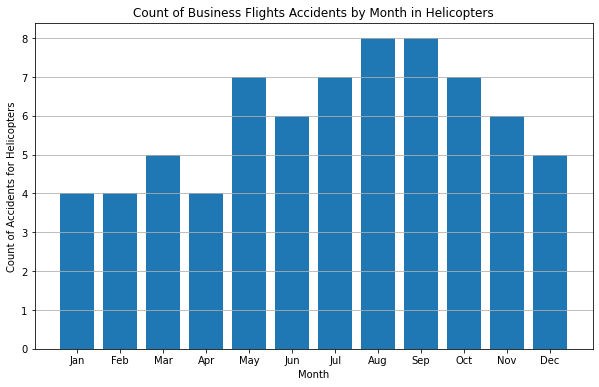

In [31]:
#Counting accidents in each month for helicopters
bf_month_heli = bf_heli.groupby('Month')['Event Id'].count().reset_index(name='count')

x_m_heli = bf_month_heli['Month']
y_m_heli = bf_month_heli['count']

# Plotting business flights accidents by months
plt.figure(figsize=(10, 6))
plt.bar(x_m_heli, y_m_heli)
plt.xlabel('Month')
plt.ylabel('Count of Accidents for Helicopters')
plt.title('Count of Business Flights Accidents by Month in Helicopters')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

## Summary

Based on the analysis of the provided aviation accidents data, here are the key findings and actionable insights to help decide which aircraft to purchase for the new aviation division:

1. **Business Airplane Flights Division**:

**Insight:** Airplanes models with higher survival rates are preferable as they show better safety for potential clients.

**Action:** Prioritize when considering airplanes from following manufacturers: Piper, Cessna, Cirrus.

Airplanes Models to consider:
* Piper - M350 and M500 (formerly PA-46).
* Cessna - Citation line, Model 525 and 700.
* Cirrus - SR 22.

States with higher risk to avoid: Alaska, Texas.

July and August are higher risk months, lowest risk are December and January.


2. **Business Helicopter Flights Division**:

**Insight:** Helicopter models with higher survival rates are preferable as they show better safety for potential clients.

**Action:** Prioritize when considering helicopters from following manufacturers: Bell Make and Robinson.

Helicopters Models to concider:
* Robinson R44 and R44 II.
* Bell 407.

States with higher risk to avoid: Texas, Arizona.

August and September are higher risk months, lowest risk are December through April.

## Nest Steps

#### What can be done for further analysis?

* Analyze the total flight hours to understand accident rates per flight hour/mile flown.

* Investigate if certain regions have higher chances of accidents per flight/landing/take off.

* Look at the correlation between the age of the aircraft and accident rates.


#### Why this analysis might not solve business problem?


* Missing or incomplete accident reports and flight data can lead to skewed results.

* Only major accidents are reported, missing minor incidents.

* Limited dataset with no data outside of accidents.

#### What additional reserach is needed for business decisions?

* Market Research - In-depth analysis of market trends and customer preferences

* Profitability - Evaluation of potential revenue streams and cost management

* Operational Feasibility - Assessment of logistics, safety, and regulatory requirements.

#### Links

[Github repository for the project](https://github.com/dolgorp/phase1_project)

[Tableau dashborad](https://public.tableau.com/app/profile/dolgor.purbueva/viz/AviationAccidentsProject/Dashboard)